In [103]:
import pandas as pd 
import numpy as np  
import matplotlib.pyplot as plt 

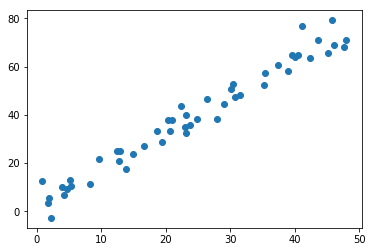

In [60]:
x = np.arange(50) + np.random.normal(0,2, 50)
y = 1.6 * x + np.random.normal(0,5, 50) 
plt.scatter(x,y)

In [61]:
X = np.c_[x,y]

In [29]:
def Normalize(X): 
    n = X.shape[1]
    for i in range(n): 
        X[:,i] = (X[:,i] -X[:,i].mean())/X[:,i].std()
    return X 

In [62]:
X_n = Normalize(X)
m = X.shape[0]

In [63]:
X_cov_mat = 1/m * X_n.T @ X_n
X_cov_mat

array([[1.        , 0.98193624],
       [0.98193624, 1.        ]])

In [64]:
U, S, V = np.linalg.svd(X_cov_mat)
# U means eigenvectors
# S means eigenvalues 
U ,S

(array([[-0.70710678, -0.70710678],
        [-0.70710678,  0.70710678]]), array([1.98193624, 0.01806376]))

Red vector explains variance in better way


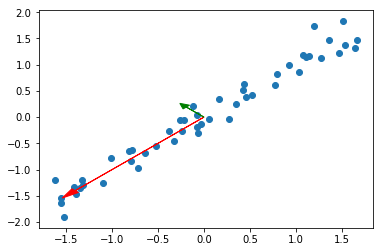

In [94]:
plt.scatter(X_n[:,0],X_n[:,1])
plt.arrow(0,0, S[0] * U[0,0], S[0] * U[1,0], head_width=0.1, head_length=0.2, color = 'r')
plt.arrow(0,0, 15* S[1] * U[1,0], 15 * S[1] * U[1,1], head_width=0.1, head_length=0.1, color = 'g') # green is so small that I increased it for better visualization
print("Red vector explains variance in better way")

In [72]:
S[0]/S.sum() #first vector explains 99% of variance 

0.990968121156862

Text(0, 0.5, 'explained variance')

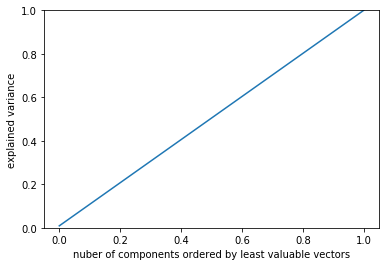

In [82]:
from sklearn.decomposition import PCA
pca = PCA().fit(X_n)
plt.plot(np.cumsum(pca.explained_variance_ratio_[::-1]))
plt.ylim(0,1,4)
plt.xlabel('nuber of components ordered by least valuable vectors')
plt.ylabel('explained variance')

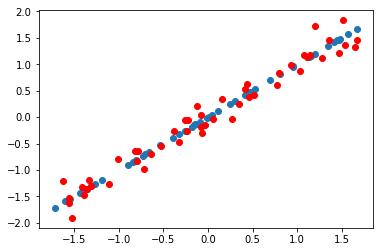

In [95]:
sklearn_pca = PCA(n_components=1)
Y_sklearn = sklearn_pca.fit_transform(X_n)
X_rec = Y_sklearn @ U[:,:1].T
plt.scatter(X_rec[:,0], X_rec[:,1])  # blue dots - recovered data from PCA 
plt.plot(X_n[:,0],X_n[:,1], 'ro')    # red dots - actual data

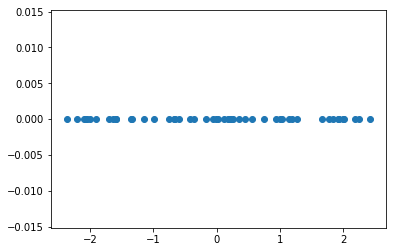

In [102]:
plt.scatter( Y_sklearn, np.zeros(50)) # Y_sklearn is X_n projected onto a single dimension 